Apuntes:

#Fase 1 Entendimiento del Negocio

El contexto detras de este set de datos se encuentra en la Oficina de Meteorología de la Commonwealth de Australia. Esta institucion recopilo datos de observaciones del clima en varias ciudades de Australia, como la temperatura minima y maxima, la direccion y velocidad del viento, humedad y presion en distintas horas del dia, ademas de si llovio o no ese dia y cuan soleado estuvo.

El objetivo es tratar de predecir si habra o no lluvia al siguiente dia, o alternativamente, cuanto riesgo de lluvia habrá.
Variable objetivo RainTomorrow(si hay lluvia al día siguiente - No / Sí)

#Fase 2 : Comprension de los Datos

## Preparación del proyecto
Para empezar hacemos importaciones de librerias y configuraciones iniciales necesarias para el desarrollo del proyecto

In [ ]:
from scipy.stats import pearsonr
import pickle as pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce

In [ ]:
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  name=fn
name = '/content/weatherAUS (2).csv'

In [ ]:
df = pd.read_csv(name, sep=",", low_memory=False)

In [ ]:
#import warnings
#warnings.filterwarnings("ignore")
#pd.set_option('display.max_columns', None)

## Contexto
El proyecto se trata del estudio de un set de datos con lecturas relacionadas al clima en distintas ciudades de Australia. En este caso buscamos predecir la variable objetivo  RainTomorrow(si hay lluvia al día siguiente - No / Sí), esta variable objetivo es de dtype Object. Debido a esto ultimo, nuestro proyecto apuntara al uso de un problema de clasificacion para eventualmente realizar una prediccion si hay lluvia al día siguiente.

In [ ]:
df["RainTomorrow"].sample(10)

61761    Yes
2341     Yes
24206     No
6991      No
9178      No
50817    Yes
82333     No
10071    Yes
27704     No
34363     No
Name: RainTomorrow, dtype: object

## Analisis exploratorio de los datos
Primeramente partimos estudiando el set de datos que vamos a trabajar para poder entender qué tenemos en frente.

Podemos apreciar que el set de datos inicialmente consiste de 94773mil 193 registros repartidos en 24 columnas

In [ ]:
df.shape

(94773, 24)

Partimos extrayendo una muestra aleatoria de todo el set de datos con tamaño de 10 filas

Ahora revisamos el tamaño del set y los tipos de datos que hay en cada columna.
Podemos apreciar que el set completo consta de 142.193 filas repartidas en 24 columnas.

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94773 entries, 0 to 94772
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           94773 non-null  object 
 1   Location       94773 non-null  object 
 2   MinTemp        94313 non-null  float64
 3   MaxTemp        94554 non-null  float64
 4   Rainfall       93718 non-null  float64
 5   Evaporation    52579 non-null  float64
 6   Sunshine       45783 non-null  float64
 7   WindGustDir    89081 non-null  object 
 8   WindGustSpeed  89089 non-null  float64
 9   WindDir9am     87119 non-null  object 
 10  WindDir3pm     92116 non-null  object 
 11  WindSpeed9am   93615 non-null  float64
 12  WindSpeed3pm   93014 non-null  float64
 13  Humidity9am    93482 non-null  float64
 14  Humidity3pm    93067 non-null  float64
 15  Pressure9am    85072 non-null  float64
 16  Pressure3pm    85119 non-null  float64
 17  Cloud9am       58619 non-null  float64
 18  Cloud3

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,94313.000000,94554.000000,93718.000000,52579.000000,45783.000000,89089.000000,93615.000000,93014.000000,93482.000000,93067.000000,85072.000000,85119.000000,58619.000000,57476.000000,93982.000000,93514.000000,94772.000000
mean,12.086363,22.760775,2.535371,5.228030,7.343673,39.613095,13.719821,18.691197,71.141910,53.623497,1017.965065,1015.579612,4.635340,4.676178,16.631721,21.271491,2.545965
std,6.453314,6.860699,9.161801,3.898111,3.817624,13.969601,9.159842,9.254961,17.640345,20.150883,6.985780,6.901049,2.855771,2.683920,6.417713,6.669658,9.172574
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.400000,17.800000,0.000000,2.600000,4.400000,30.000000,7.000000,11.000000,60.000000,39.000000,1013.400000,1011.000000,1.000000,2.000000,12.000000,16.500000,0.000000
50%,12.100000,22.600000,0.000000,4.600000,8.200000,37.000000,13.000000,17.000000,71.000000,54.000000,1018.000000,1015.600000,6.000000,5.000000,16.600000,21.100000,0.000000
75%,17.100000,27.600000,0.800000,7.000000,10.400000,48.000000,19.000000,24.000000,84.000000,67.000000,1022.600000,1020.200000,7.000000,7.000000,21.400000,25.900000,0.800000
max,33.900000,47.300000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,38.300000,46.700000,371.000000


**Análisis Descriptivo de los Cuartiles de Temperatura y Precipitación**
Al realizar un análisis preliminar de los datos de temperatura mínima y máxima, así como de las precipitaciones, se pueden observar las siguientes características destacadas en los cuartiles:

**Temperatura Mínima (MinTemp)**
* Primer Cuartil (Q1): La temperatura mínima del primer cuartil varía entre -8.5 y 7.6 grados Celsius, cubriendo un rango de aproximadamente 16 grados. Esto indica una alta variabilidad en las temperaturas más bajas.
* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura oscila entre 7.6 y 12 grados Celsius, presentando un rango más estrecho de unos 4.4 grados.
* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura varía de 12 a 16.8 grados Celsius, con un rango de aproximadamente 4.8 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 16.8 y 33.9 grados Celsius, mostrando un rango de aproximadamente 17 grados. Este rango más amplio sugiere que las temperaturas más altas tienen una mayor dispersión.

**Temperatura Máxima (MaxTemp)**
* Primer Cuartil (Q1): La temperatura máxima del primer cuartil se sitúa entre -4.8 y 17.9 grados Celsius, cubriendo un rango de aproximadamente 22.7 grados.
* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura varía entre 17.9 y 22.6 grados Celsius, abarcando un rango de 4.7 grados.
* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura fluctúa de 22.6 a 28.2 grados Celsius, presentando un rango de 5.6 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 28.2 y 48.1 grados Celsius, con un rango de aproximadamente 19.9 grados, mostrando una mayor dispersión en las temperaturas más altas.

**Precipitaciones (Rainfall)**
* Primer a Tercer Cuartil (Q1-Q3): La mayoría de los datos de precipitaciones se concentran en valores bajos, ya que los valores de los primeros tres cuartiles (Q1, Q2 y Q3) son todos 0 mm. Esto indica que hubo pocos días con precipitaciones registradas.
* Cuarto Cuartil (Q4): En el cuarto cuartil, las precipitaciones varían entre 0.8 mm y 371 mm, con un rango considerable de aproximadamente 370.2 mm. Esto sugiere que las lluvias fueron escasas pero intensas en ciertos días.


Estos análisis muestran la variabilidad en las temperaturas mínimas y máximas, con una dispersión mayor en los extremos de los cuartiles. Las precipitaciones, por otro lado, muestran que la mayoría de los días tuvieron poca o ninguna lluvia, concentrándose las precipitaciones en eventos menos frecuentes pero más intensos.

Esta interpretación permite una comprensión detallada de las características climáticas en los datos, proporcionando una base sólida para futuros análisis y modelos predictivos.

Al realizar un análisis preliminar de la temperatura máxima. El primer cuartil tiene un rango de aproximadamente 23 grados, mientras que el cuarto cuartil abarca unos 20 grados. Los cuartiles intermedios muestran rangos más reducidos, con el segundo cuartil cubriendo alrededor de 5 grados y el tercer cuartil aproximadamente 6 grados.
Por otra parte la temperatura mínima en el conjunto de datos, se observa que los datos se distribuyen ampliamente en el primer y cuarto cuartil. El primer cuartil cubre un intervalo de aproximadamente 16 grados, con valores que oscilan entre -8.5 y 7.6 grados Celsius. En contraste, el cuarto cuartil abarca un rango de alrededor de 17 grados, desde 16.8 hasta 33.9 grados Celsius. Los cuartiles intermedios presentan rangos más estrechos, con el segundo cuartil variando unos 5 grados (de 7.6 a 12) y el tercer cuartil alrededor de 4 grados (de 12 a 16.8).



Pasando al análisis de las precipitaciones (Rainfall), se evidencia que las lluvias fueron escasas durante el periodo analizado. Las precipitaciones significativas se registran principalmente en el cuarto cuartil, el cual muestra un rango considerable de aproximadamente 370 mm, con valores que van desde 0.8 mm hasta 371 mm. Esto sugiere que la mayoría de los días tuvieron poca o ninguna lluvia, concentrándose las precipitaciones en unos pocos eventos de alta intensidad.


Estos análisis ayudan a entender la distribución de las temperaturas y las precipitaciones en los datos, destacando las variaciones entre los diferentes cuartiles y proporcionando información valiosa para futuras etapas de la minería de datos.










###Correlacion

In [ ]:
corr = df.corr(numeric_only=True)
print(corr)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.733948  0.116703     0.473586  0.047332   
MaxTemp        0.733948  1.000000 -0.055748     0.576960  0.441144   
Rainfall       0.116703 -0.055748  1.000000    -0.048263 -0.218778   
Evaporation    0.473586  0.576960 -0.048263     1.000000  0.325781   
Sunshine       0.047332  0.441144 -0.218778     0.325781  1.000000   
WindGustSpeed  0.159803  0.042966  0.127338     0.201521 -0.058031   
WindSpeed9am   0.164732 -0.045389  0.098775     0.172821 -0.035471   
WindSpeed3pm   0.183230  0.050913  0.054910     0.140123  0.052190   
Humidity9am   -0.228695 -0.443049  0.214885    -0.474182 -0.465694   
Humidity3pm    0.066913 -0.459202  0.248825    -0.326238 -0.615560   
Pressure9am   -0.421781 -0.323438 -0.150430    -0.275312  0.038145   
Pressure3pm   -0.419759 -0.405911 -0.115001    -0.286777 -0.016178   
Cloud9am       0.097558 -0.254604  0.190335    -0.134932 -0.673516   
Cloud3pm       0.024

A continuacion revisamos la correlación que existe entre cada variable con todas las demas, sin embargo teniendo presente que aunque exista correlación no necesariamente implica que exista causalidad.
Podemos observar que en muchos casos existen correlaciones tanto positivas como negativas, lo que significa que es posible que la relación entre algunas variables sea inversa, por ejemplo las variables Sunshine con Rainfall, lo que sugiere que mientras más brillo del sol haya menos precipitaciones habrá.

En el siguiente recuadro podemos apreciar la cantidad de valores nulos que hay en el set de datos, habiendo el mayor numero en las variables Sunshine(67816), Evaporation(60843) y Cloud3pm(57094).

---



In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp            460
MaxTemp            219
Rainfall          1055
Evaporation      42194
Sunshine         48990
WindGustDir       5692
WindGustSpeed     5684
WindDir9am        7654
WindDir3pm        2657
WindSpeed9am      1158
WindSpeed3pm      1759
Humidity9am       1291
Humidity3pm       1706
Pressure9am       9701
Pressure3pm       9654
Cloud9am         36154
Cloud3pm         37297
Temp9am            791
Temp3pm           1259
RainToday         1056
RISK_MM              1
RainTomorrow         1
dtype: int64

In [ ]:
df.isna().sum().sum()

216433


El total datos nulos es de 316.559 datos nulos.

Y a continuacion se puede verificar que los datos nulos estan repartidos entre 85.773 registros en las 24 columnas

In [ ]:
datos_nulos = df[df.isna().any(axis=1)]
print(datos_nulos)

             Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0      2008-12-01    Albury     13.4     22.9       0.6          NaN   
1      2008-12-02    Albury      7.4     25.1       0.0          NaN   
2      2008-12-03    Albury     12.9     25.7       0.0          NaN   
3      2008-12-04    Albury      9.2     28.0       0.0          NaN   
4      2008-12-05    Albury     17.5     32.3       1.0          NaN   
...           ...       ...      ...      ...       ...          ...   
94768  2011-01-26  Adelaide     16.7     29.6       0.4          NaN   
94769  2011-01-27  Adelaide     19.5     32.0       0.0         12.4   
94770  2011-01-28  Adelaide     15.8     31.8       0.0          8.0   
94771  2011-01-29  Adelaide     18.5     37.7       0.0          NaN   
94772  2011-01-30  Adelaide     25.8     42.5       0.0          NaN   

       Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0           NaN           W           44.0          W  ...   

Encontramos que los registros del clima corresponden a muchas ciudades de Australia

In [ ]:
print(f'Las ciudades en el dataset son: {df["Location"].unique()}')
print(f'Siendo un total de {len(df["Location"].unique())} ciudades')

Las ciudades en el dataset son: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide']
Siendo un total de 33 ciudades


Ademas podemos observar que la mayoria de registros (la moda) fueron tomados en la ciudad de Canberra

In [ ]:
df["Location"].mode()

0    Canberra
Name: Location, dtype: object

## Tratamiento de los datos
Procederemos a tratar los valores nulos comenzando por el atributo de MinTemp, podemos ver que tiene 637 datos nulos

In [ ]:
df["MinTemp"].isna().sum()

460

Creamos un dataset de apoyo con las columnas Location y MinTemp para apreciar el antes y despues y mostramos los promedios de cada grupo de ubicacion

In [ ]:
promediosantes = df.groupby("Location")["MinTemp"].mean()
promediosantes

Location
Adelaide            12.759279
Albury               9.520899
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
GoldCoast           17.341490
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Penrith             12.533649
Portland             9.585537
Richmond            11.346070
Sale                 8.561220
Sydney              14.865057
SydneyAirport       14.894041
Townsville          20.411250
Tuggeranong          7.245612
WaggaWagga           9.562030
Watsonia            10.126228
Williamtown         12.820376
Wollongong          14.949058
N

Reemplazamos los valores nulos utilizando el promedio de temperaturas minimas segun cada grupo de ciudades de forma independiente

In [ ]:
df["MinTemp"] = df["MinTemp"].fillna(df.groupby("Location")["MinTemp"].transform("mean"))

In [ ]:
#df["MinTemp"] = df.groupby("Location")["MinTemp"].apply(lambda x: x.fillna(x.mean()))

TypeError: incompatible index of inserted column with frame index

Y de esa manera nos deshacemos de los valores nulos de esa columna mientras mantenemos los promedios originales

In [ ]:
promediosdesps = df.groupby("Location")["MinTemp"].mean()
promediosdesps

Location
Adelaide            12.759279
Albury               9.520899
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
GoldCoast           17.341490
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Penrith             12.533649
Portland             9.585537
Richmond            11.346070
Sale                 8.561220
Sydney              14.865057
SydneyAirport       14.894041
Townsville          20.411250
Tuggeranong          7.245612
WaggaWagga           9.562030
Watsonia            10.126228
Williamtown         12.820376
Wollongong          14.949058
N

Podemos ver que hemos reemplazado todos los datos nulos de la columna MinTemp

In [ ]:
df["MinTemp"].isna().sum()

0

Luego procedemos a hacer lo mismo con los demas atributos

In [ ]:
print(f'Cantidad de valores nulos en columna MaxTemp: {df["MaxTemp"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humidity9am: {df["Humidity9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humidity3pm: {df["Humidity3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna WindSpeed9am: {df["WindSpeed9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna WindSpeed3pm: {df["WindSpeed3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna MaxTemp: 219
Cantidad de valores nulos en columna Humidity9am: 1291
Cantidad de valores nulos en columna Humidity3pm: 1706
Cantidad de valores nulos en columna Temp9am: 791
Cantidad de valores nulos en columna Temp3pm: 1259
Cantidad de valores nulos en columna WindSpeed9am: 1158
Cantidad de valores nulos en columna WindSpeed3pm: 1759
Cantidad de valores nulos en columna Pressure9am: 9701
Cantidad de valores nulos en columna Pressure3pm: 9654


Aplicamos las sustituciones de los nulos usando lambdas

In [ ]:
df["MaxTemp"] = df["MaxTemp"].fillna(df.groupby("Location")["MaxTemp"].transform("mean"))

df["Humidity9am"] = df["Humidity9am"].fillna(df.groupby("Location")["Humidity9am"].transform("mean"))
df["Humidity3pm"] = df["Humidity3pm"].fillna(df.groupby("Location")["Humidity3pm"].transform("mean"))

df["Temp9am"] = df["Temp9am"].fillna(df.groupby("Location")["Temp9am"].transform("mean"))
df["Temp3pm"] = df["Temp3pm"].fillna(df.groupby("Location")["Temp3pm"].transform("mean"))

df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df.groupby("Location")["WindSpeed9am"].transform("mean"))
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df.groupby("Location")["WindSpeed3pm"].transform("mean"))

df["Pressure9am"] = df["Pressure9am"].fillna(df.groupby("Location")["Pressure9am"].transform("mean"))
df["Pressure3pm"] = df["Pressure3pm"].fillna(df.groupby("Location")["Pressure3pm"].transform("mean"))



Y podemos apreciar que ya se han reemplazado todos excepto las columnas Pressure

In [ ]:
print(f'Cantidad de valores nulos en columna MaxTemp: {df["MaxTemp"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humidity9am: {df["Humidity9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humidity3pm: {df["Humidity3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna WindSpeed9am: {df["WindSpeed9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna WindSpeed3pm: {df["WindSpeed3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna MaxTemp: 0
Cantidad de valores nulos en columna Humidity9am: 0
Cantidad de valores nulos en columna Humidity3pm: 0
Cantidad de valores nulos en columna Temp9am: 0
Cantidad de valores nulos en columna Temp3pm: 0
Cantidad de valores nulos en columna WindSpeed9am: 0
Cantidad de valores nulos en columna WindSpeed3pm: 0
Cantidad de valores nulos en columna Pressure9am: 8826
Cantidad de valores nulos en columna Pressure3pm: 8826


In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall          1055
Evaporation      42194
Sunshine         48990
WindGustDir       5692
WindGustSpeed     5684
WindDir9am        7654
WindDir3pm        2657
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am       8826
Pressure3pm       8826
Cloud9am         36154
Cloud3pm         37297
Temp9am              0
Temp3pm              0
RainToday         1056
RISK_MM              1
RainTomorrow         1
dtype: int64

Como pudimos ver en el resultado anterior todavia existen nulos en la columna Pressure9am y Pressure3pm, asi que haremos haremos la misma operacion pero esta vez utilizando la mediana de todo el dataset ya que no hay mucha variacion en la presion y ademas son solamente 11 mil y poco mas valores

In [ ]:
print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna Pressure9am: 8826
Cantidad de valores nulos en columna Pressure3pm: 8826


In [ ]:
for columna in df:
  mediana9am = df["Pressure9am"].median()
  df["Pressure9am"] = df["Pressure9am"].fillna(mediana9am)

  mediana3pm = df["Pressure3pm"].median()
  df["Pressure3pm"] = df["Pressure3pm"].fillna(mediana3pm)

In [ ]:
print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna Pressure9am: 0
Cantidad de valores nulos en columna Pressure3pm: 0


In [ ]:
print(df['Pressure9am'].median())
print(df['Pressure3pm'].median())

1018.0242715231788
1015.6


Ahora procederemos con el escalado de los datos, en este caso vamos a escalar la presion transformando los valores desde hectopascales (hPa) a libras por pulgada cuadrada (psi) utilizando la formula: **psi = hPa / 68,947**

In [ ]:
print( df['Pressure3pm'].sample(1) )
print( df['Pressure9am'].sample(1) )

47467    1019.0
Name: Pressure3pm, dtype: float64
8330    1019.2
Name: Pressure9am, dtype: float64


In [ ]:
df['Pressure3pm'] = df['Pressure3pm'] / 68.947
df['Pressure9am'] = df['Pressure9am'] / 68.947

In [ ]:
print( df['Pressure3pm'].sample(1) )
print( df['Pressure9am'].sample(1) )

25046    14.730155
Name: Pressure3pm, dtype: float64
57028    14.809926
Name: Pressure9am, dtype: float64


Ahora vamos a tratar los valores nulos en la columna RainToday, para eso primero vamos a revisar la cantidad de registros por ubicacion, ya que existen solo 1406 y asi nos aseguramos que al eliminarlos no estaremos eliminando una ciudad por completo

In [ ]:
df["Location"].value_counts()

Location
Canberra            3418
Sydney              3337
Brisbane            3161
Bendigo             3034
Townsville          3033
Ballarat            3028
Albury              3011
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
CoffsHarbour        2953
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928
MountGinini         2907
Moree               2854
Williamtown         2553
Melbourne           2435
Nhil                1569
Adelaide             917
Name: count, dtype: int64

In [ ]:
df = df.dropna(subset=['RainToday'])

En el siguiente cuadro podemos ver que comparando el resultado anterior con este la cantidad de registros por ciudad en el dataset cambiaron de forma minuscula teniendo en mente la cantidad de datos totales

In [ ]:
df["Location"].value_counts()

Location
Canberra            3402
Sydney              3331
Brisbane            3132
Bendigo             3030
Townsville          3027
Ballarat            3017
MelbourneAirport    3009
Mildura             3005
SydneyAirport       3001
Sale                2992
Albury              2991
Watsonia            2990
Portland            2984
Cobar               2980
Cairns              2964
Tuggeranong         2959
WaggaWagga          2958
NorfolkIsland       2944
Wollongong          2943
CoffsHarbour        2940
Dartmoor            2939
Newcastle           2929
GoldCoast           2924
Penrith             2911
Richmond            2906
NorahHead           2888
BadgerysCreek       2877
MountGinini         2816
Moree               2791
Williamtown         2376
Melbourne           2298
Nhil                1565
Adelaide             898
Name: count, dtype: int64

Como observacion podemos ver que ademas de haber eliminado los registros donde el valor en RainToday era nulo tambien se eliminaron los nulos de Rainfall, es decir que si no hubo lectura de milimetros de precipitacion por consecuencia tampoco hubo registro de si llovio o no ese dia

In [ ]:
df["Rainfall"].isna().sum()

0

Ahora procedemos a eliminar los atributos Evaporation y Sunshine ya que no son representativos y no presentan una verdadera relacion con las variables RainToday y RainTomorrow que son las mas relevantes para el estudio

In [ ]:
df.groupby("Sunshine")[["RainToday","RainTomorrow"]].value_counts().unstack()

RainTomorrow           No    Yes
Sunshine RainToday              
0.0      No         302.0  398.0
         Yes        149.0  812.0
0.1      No          91.0  125.0
         Yes         46.0  120.0
0.2      No          98.0   89.0
...                   ...    ...
13.9     Yes          1.0    NaN
14.0     No          10.0    NaN
14.1     No           3.0    NaN
14.3     No           2.0    NaN
14.5     No           1.0    NaN

[284 rows x 2 columns]

In [ ]:
df = df.drop(["Evaporation", "Sunshine"], axis =1)

Luego trataremos los atributos relacionados al viento, tanto la velocidad como la direccion. Comenzaremos con la velocidad del viento

In [ ]:
df["WindGustSpeed"] = df.groupby("Location")["WindGustSpeed"].apply(lambda x: x.fillna(x.mean()).astype(x.dtype).reset_index(drop=True))

TypeError: incompatible index of inserted column with frame index

In [ ]:
df["WindGustSpeed"].isna().sum()

5581

Ahora procedemos a tratar los valores nulos de las columnas de direccion del viento, variables que son de tipo categorica y por ello no podemos usar el promedio como lo hicimos antes, esta vez utilizaremos la moda ya que es el valor que mas se repite

In [ ]:
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

Y para finalizar el tratamiento de los valores nulos procedemos a trabajar los atributos Cloud3pm y Cloud9am que se refieren a qué tan nublado estaba el cielo en esa hora del dia

In [ ]:
df[["Cloud9am","Cloud3pm"]]

,Cloud9am,Cloud3pm
0,8.0,NaN
1,NaN,NaN
2,NaN,2.0
3,NaN,NaN
4,7.0,8.0
...,...,...
94767,NaN,NaN
94768,NaN,NaN
94769,NaN,NaN
94770,NaN,NaN


In [ ]:
df[["Cloud9am","Cloud3pm"]].isna().sum()

Cloud9am    35382
Cloud3pm    36553
dtype: int64

Estas dos variables aunque son numericas tambien son categoricas porque explican clasificaciones segun los porcentajes de nubosidad en el cielo, por lo tanto utilizaremos la mediana segun ubicacion

In [ ]:
df["Cloud9am"] = df.groupby("Location")["Cloud9am"].apply(lambda x: x.fillna(x.median()))
df["Cloud3pm"] = df.groupby("Location")["Cloud3pm"].apply(lambda x: x.fillna(x.median()))

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local

TypeError: incompatible index of inserted column with frame index

Como vemos aun quedan valores nulos asi que ahora usaremos la mediana de todo el dataset

In [ ]:
df[["Cloud9am","Cloud3pm"]].isna().sum()

Cloud9am    35382
Cloud3pm    36553
dtype: int64

In [ ]:
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())

In [ ]:
df[["Cloud9am","Cloud3pm"]].isna().sum()

Cloud9am    0
Cloud3pm    0
dtype: int64

Finalmente volvemos a revisar el conteo de nulos y podemos observar que ya no existen mas nulos

In [ ]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

## Creacion de columnas utiles
A continuacion procedemos a crear columnas que nos pueden ser utiles para realizar una predicción, primeramente los promedios de velocidad del viento, temperatura, humedad y presión para cada registro en especifico utilizando los valores registrados a las 9am y 3pm

In [ ]:
df['VelVientoPromedio'] = (df['WindSpeed9am'] + df['WindSpeed3pm']) / 2
df['TempPromedio'] = (df['Temp9am'] + df['Temp3pm']) / 2
df['HumedadPromedio'] = (df['Humidity9am'] + df['Humidity3pm']) / 2
df['PresionPromedio'] = (df['Pressure9am'] + df['Pressure3pm']) / 2

df['Fecha'] = pd.to_datetime(df['Date'])
df['Anio'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month

In [ ]:
df[["Fecha","Anio","Mes"]].sample(4)

,Fecha,Anio,Mes
83722,2014-05-03,2014,5
84777,2017-04-08,2017,4
25825,2015-06-22,2015,6
61496,2014-01-24,2014,1


In [ ]:
df[['WindSpeed9am','WindSpeed3pm','VelVientoPromedio']].sample(4)

,WindSpeed9am,WindSpeed3pm,VelVientoPromedio
89392,15.0,24.0,19.5
78160,0.0,11.0,5.5
44161,30.0,22.0,26.0
30748,17.0,13.0,15.0


In [ ]:
df[['Temp9am','Temp3pm','TempPromedio']].sample(4)

,Temp9am,Temp3pm,TempPromedio
78207,15.9,24.6,20.25
87303,29.8,28.5,29.15
73936,15.1,14.4,14.75
38954,16.0,16.2,16.10


In [ ]:
df[['Humidity9am','Humidity3pm','HumedadPromedio']].sample(4)

,Humidity9am,Humidity3pm,HumedadPromedio
17345,72.0,57.345455,64.672727
20416,95.0,97.000000,96.000000
27581,62.0,42.000000,52.000000
12465,64.0,37.000000,50.500000


In [ ]:
df[['Pressure9am','Pressure3pm','PresionPromedio']].sample(4)

,Pressure9am,Pressure3pm,PresionPromedio
84063,14.792522,14.757712,14.775117
2122,14.509696,14.506795,14.508245
43087,14.721453,14.661987,14.691720
24168,14.765316,14.730155,14.747736


## Transformacion de variables categoricas
Ahora que hemos tratado todos los nulos procedemos a trabajar las variables categoricas, comenzando por RainToday y RainTomorrow

In [ ]:
df[["RainToday","RainTomorrow"]].sample(10)

,RainToday,RainTomorrow
18900,Yes,Yes
40874,Yes,No
4070,No,No
58366,No,Yes
42637,Yes,No
68162,No,Yes
20341,No,No
56095,No,No
39338,No,No
55717,Yes,Yes


Verificamos que sean solo 2 valores unicos

In [ ]:
df["RainToday"].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df["RainTomorrow"].unique()

array(['No', 'Yes'], dtype=object)

Aplicamos la tecnica Label Encoding

In [ ]:
df["RainToday"] = df["RainToday"].map({ "No":0, "Yes":1 })
df["RainTomorrow"] = df["RainTomorrow"].map({ "No":0, "Yes":1 })

Y ahora podemos ver que la conversion se aplico correctamente

In [ ]:
df[["RainToday","RainTomorrow"]].sample(10)

,RainToday,RainTomorrow
21207,1,1
49007,0,0
70295,0,0
70336,0,0
92655,0,0
64718,1,0
48992,0,1
20337,0,1
29570,1,1
73667,0,1


Y ahora comenzamos con la tecnica de One Hot Encoding

In [ ]:
onehotencoder_RainToday = pd.get_dummies(df['RainToday'], prefix='RainToday')
df = pd.concat([df, onehotencoder_RainToday], axis=1)
df.drop('RainToday', axis=1, inplace=True)

onehotencoder_RainTomorrow = pd.get_dummies(df['RainTomorrow'], prefix='RainTomorrow')
df = pd.concat([df, onehotencoder_RainTomorrow], axis=1)
df.drop('RainTomorrow', axis=1, inplace=True)

In [ ]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,TempPromedio,HumedadPromedio,PresionPromedio,Fecha,Anio,Mes,RainToday_0,RainToday_1,RainTomorrow_0,RainTomorrow_1
85568,2010-11-14,Cairns,24.4,32.4,0.0,ESE,39.0,SSE,ESE,17.0,...,29.35,67.0,14.683743,2010-11-14,2010,11,True,False,False,True
13439,2013-07-19,Moree,12.5,23.0,0.0,NNE,52.0,NNE,WNW,30.0,...,16.65,85.0,14.761338,2013-07-19,2013,7,True,False,False,True
3593,2010-09-11,BadgerysCreek,5.2,21.7,0.0,SW,37.0,WSW,S,19.0,...,17.95,38.0,14.754812,2010-09-11,2010,9,True,False,True,False
9131,2009-07-25,CoffsHarbour,7.9,18.3,1.4,SW,22.0,W,E,2.0,...,15.15,67.0,14.864316,2009-07-25,2009,7,False,True,True,False
40134,2013-05-19,Williamtown,7.6,18.2,0.0,W,43.0,W,W,24.0,...,15.45,40.5,14.743209,2013-05-19,2013,5,True,False,True,False


## Observación de los datos
A continuación se muestran una serie de graficos que ayudarán a entender mejor los datos y extraer información relevante que nos sirva para llegar a alguna conclusion

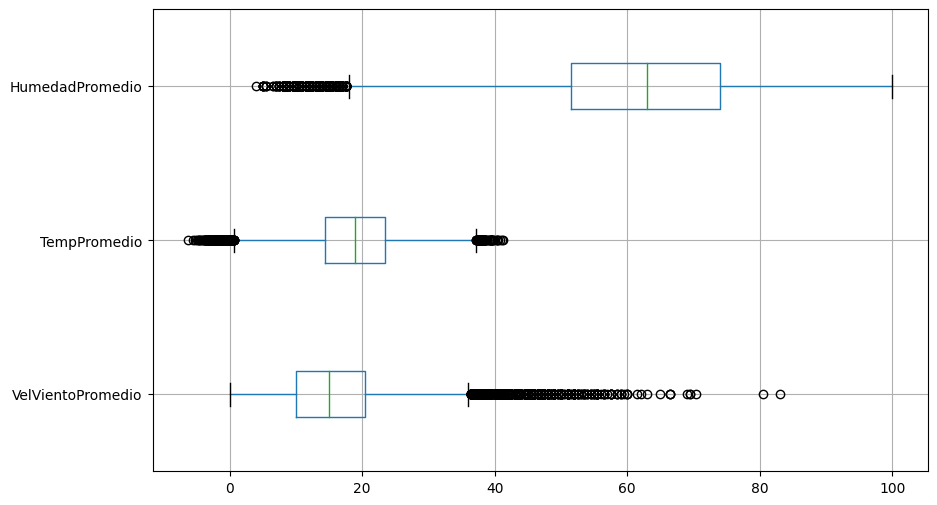

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column=["VelVientoPromedio","TempPromedio","HumedadPromedio"], vert=False)
plt.show()

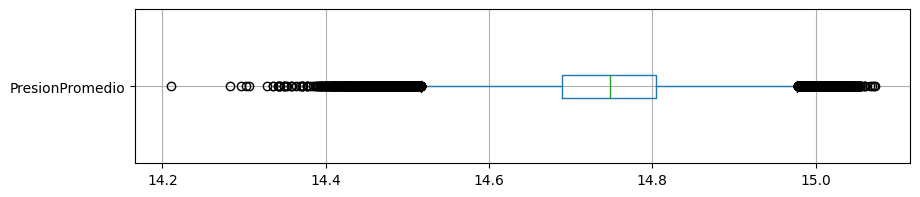

In [ ]:
plt.figure(figsize=(10,2))
df.boxplot(column=["PresionPromedio"], vert=False)
plt.show()

In [ ]:
df["HumedadPromedio"] = df["HumedadPromedio"].clip(lower=15, upper=100)
df["TempPromedio"] = df["TempPromedio"].clip(lower=1, upper=37)
df["VelVientoPromedio"] = df["VelVientoPromedio"].clip(lower=0, upper=34)
df["PresionPromedio"] = df["PresionPromedio"].clip(lower=14.57, upper=14.97)

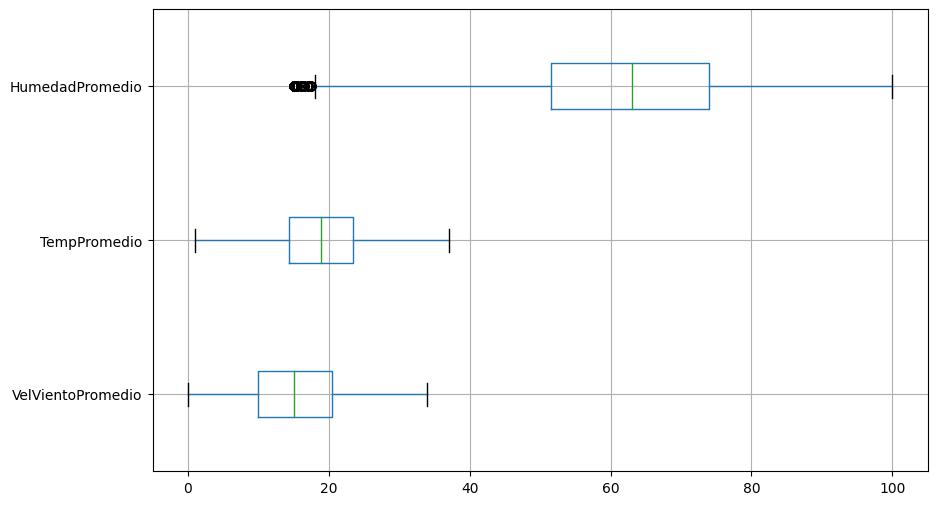

In [ ]:
plt.figure(figsize=(10,6))
df.boxplot(column=["VelVientoPromedio","TempPromedio","HumedadPromedio"], vert=False)
plt.show()

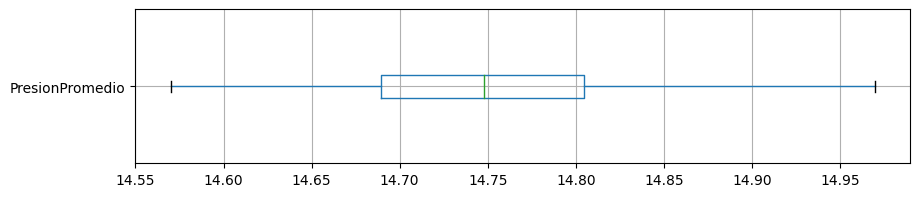

In [ ]:
plt.figure(figsize=(10,2))
df.boxplot(column=["PresionPromedio"], vert=False)
plt.show()

En el siguiente grafico podemos ver que los datos se concentran entre los años 2009 a 2016 de forma casi pareja, siendo las excepciones el 2007, 2008 y 2017

Text(0.5, 1.0, 'Cantidad de registros segun año')

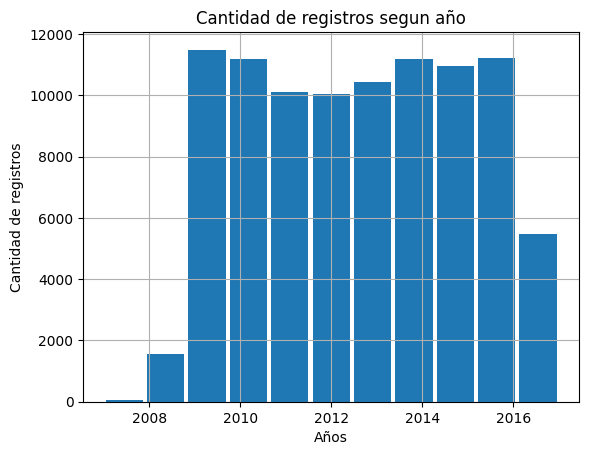

In [ ]:
df["Anio"].hist(grid=True, bins=11, orientation="vertical", rwidth=0.9)
plt.xlabel('Años')
plt.ylabel('Cantidad de registros')
plt.title('Cantidad de registros segun año')

Como podemos apreciar en el siguiente grafico resulta facil intuir que mientras mayor sea la temperatura minima tambien sera mayor la temperatura maxima ya que esos datos corresponden a areas o ciudades que son mas calurosas que las de los valores mas bajos. Esto significa que ambas variables tienen una correlacion positiva

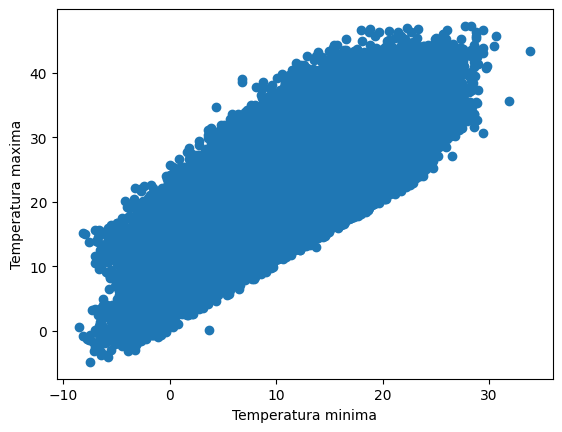

In [ ]:
plt.scatter(df["MinTemp"], df["MaxTemp"])
plt.xlabel("Temperatura minima")
plt.ylabel(("Temperatura maxima"))
plt.show()

En el siguiente grafico podemos observar que comparando todos los meses del año, la temperatura promedio, aunque varia notablemente, no parece afectar a si llueve al dia siguiente o no ya que cada uno de los graficos de violin parecen mas o menos parejos en ambos lados

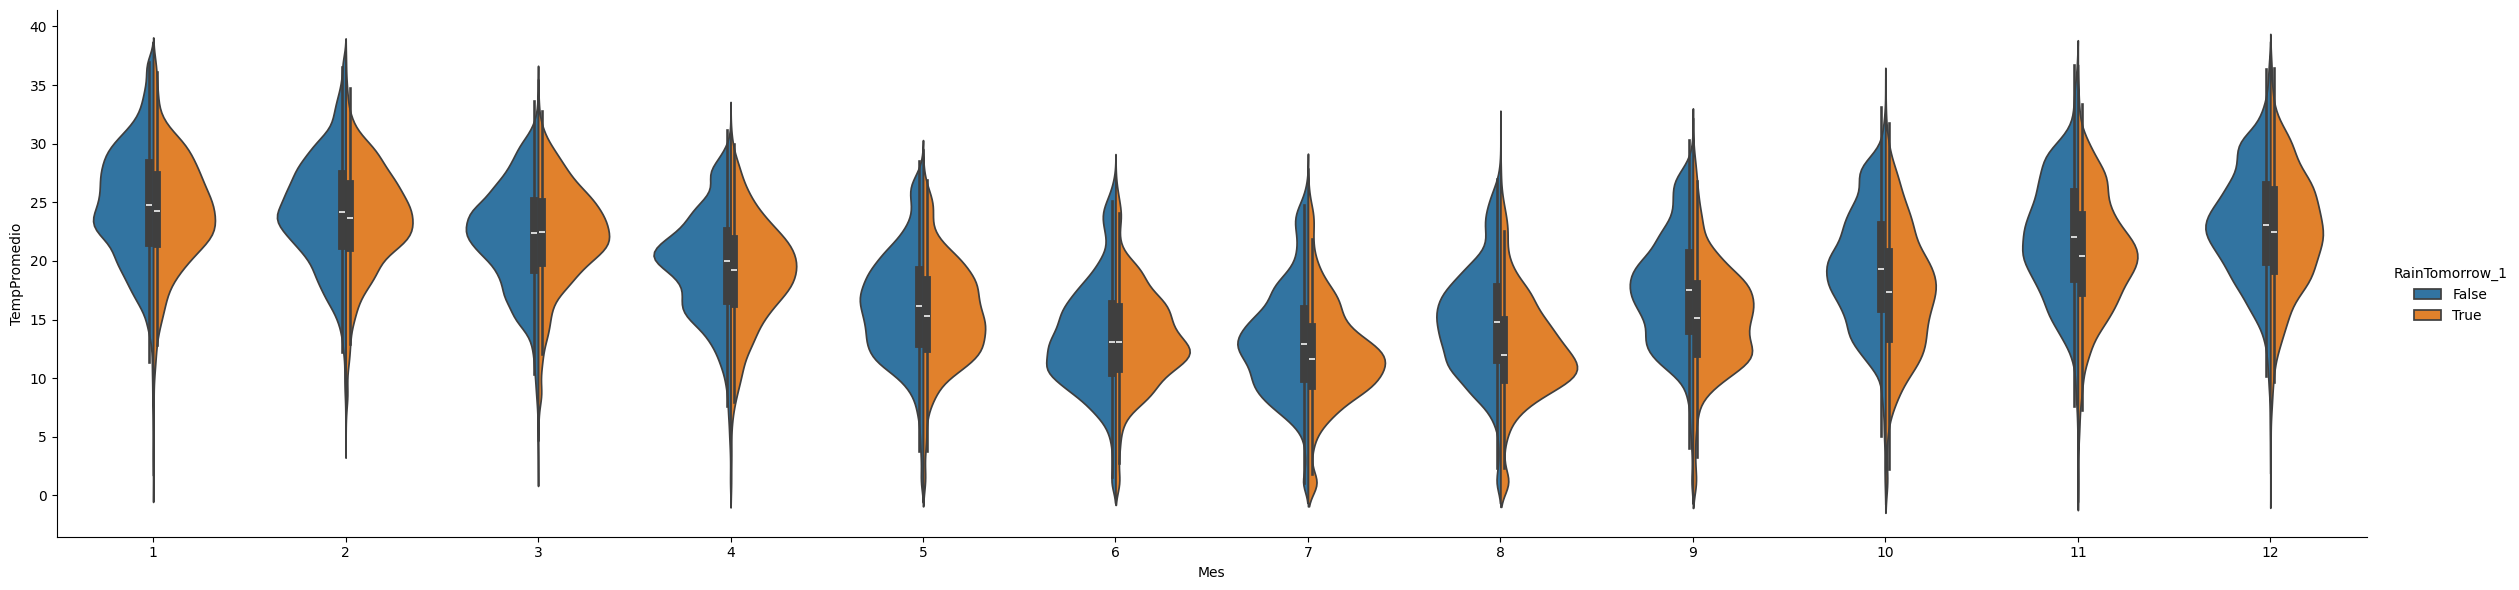

In [ ]:
datosjson = df[["Mes","TempPromedio","RainTomorrow_1"]]
sns.catplot(data=datosjson, kind="violin", x="Mes", y="TempPromedio", hue="RainTomorrow_1", split=True,height=6, aspect=4)

En este grafico de distribucion bivariada podemos observar que los puntos centrales del grafico donde se encuentran la velocidad del viento con la temperatura promedio son mas densos y tienen mas ocurrencias de lluvia al dia siguiente que los puntos que estan mas fuera del grafico, donde estan mas presentes los casos donde no llovio al dia siguiente

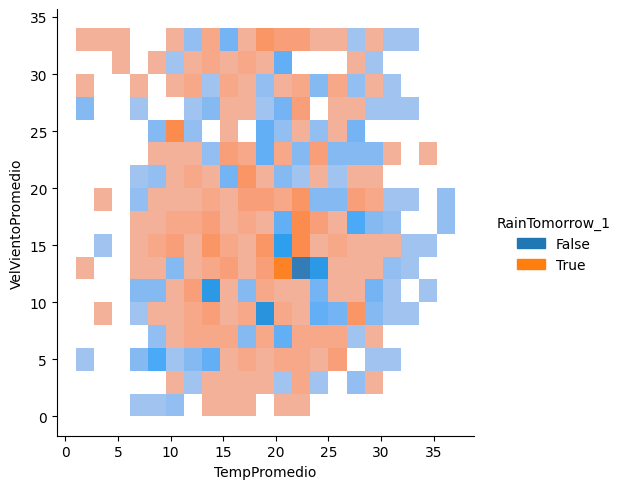

In [ ]:
datosjson = df[["TempPromedio","RainTomorrow_1","VelVientoPromedio","HumedadPromedio","PresionPromedio"]].sample(1000)
sns.displot(datosjson, x="TempPromedio", y="VelVientoPromedio", hue="RainTomorrow_1")

Podemos ver que la humedad en cada año suele ser mas o menos igual en cuanto a rango a la del resto de años

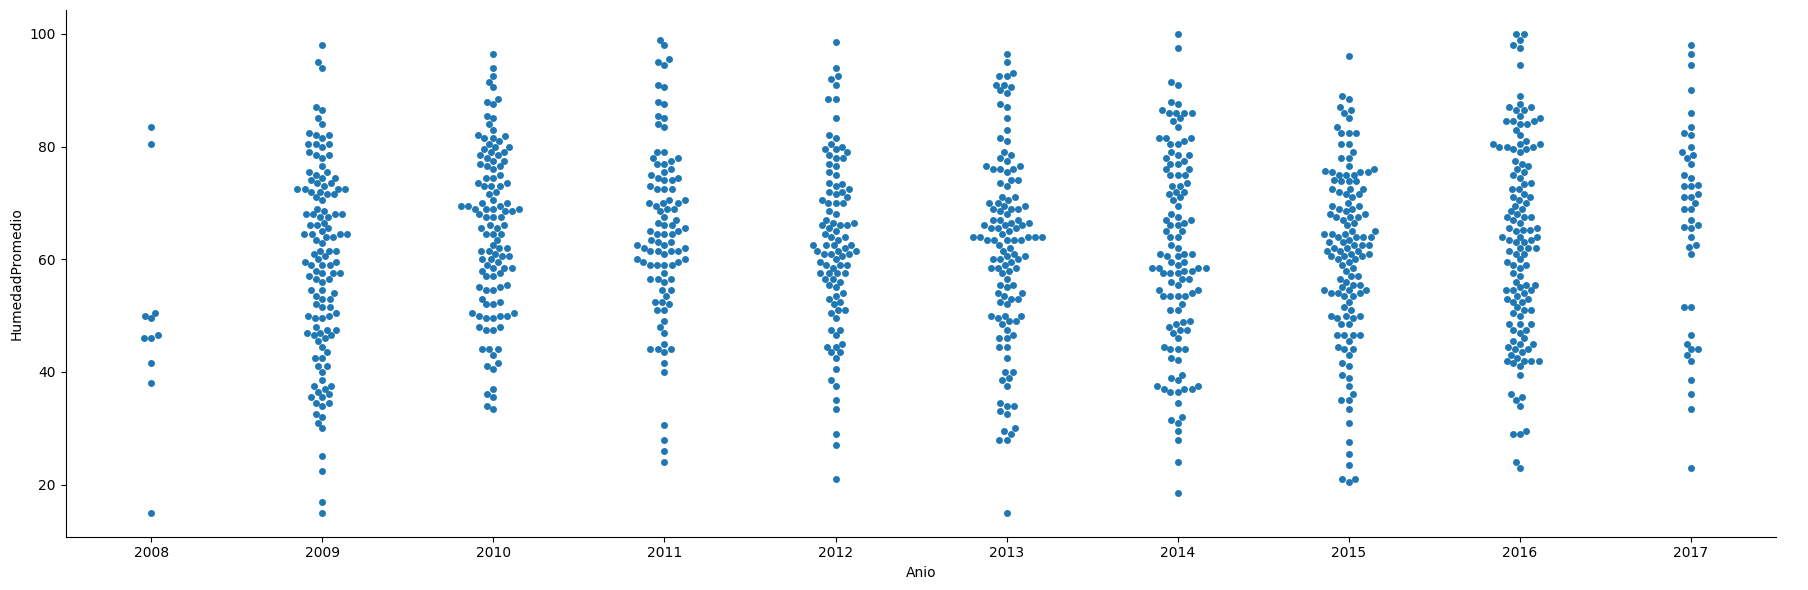

In [ ]:
datosjson = df[["Anio","RainTomorrow_1","VelVientoPromedio","HumedadPromedio","PresionPromedio"]].sample(1000)
sns.catplot(data=datosjson, x="Anio", y="HumedadPromedio", kind="swarm", height=6, aspect=3)

In [ ]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,TempPromedio,HumedadPromedio,PresionPromedio,Fecha,Anio,Mes,RainToday_0,RainToday_1,RainTomorrow_0,RainTomorrow_1
30781,2011-09-10,Sydney,7.4,16.9,1.6,W,57.0,WSW,WSW,31.0,...,13.400000,35.000000,14.638055,2011-09-10,2011,9,False,True,True,False
31636,2014-03-12,Sydney,19.2,29.2,0.0,SE,37.0,WNW,E,7.0,...,24.850000,60.500000,14.746835,2014-03-12,2014,3,True,False,False,True
63301,2010-07-20,MelbourneAirport,2.1,12.4,0.0,N,31.0,N,NNW,24.0,...,8.050000,79.000000,14.848362,2010-07-20,2010,7,True,False,False,True
17547,2017-01-25,Newcastle,19.6,24.2,26.4,W,35.0,SW,SE,9.0,...,21.408349,74.172727,14.747736,2017-01-25,2017,1,False,True,True,False
44542,2008-05-10,Canberra,1.5,20.9,0.0,NW,20.0,NW,NNW,2.0,...,14.650000,60.500000,14.817178,2008-05-10,2008,5,True,False,True,False
85019,2009-05-14,Cairns,20.9,28.8,0.0,SE,37.0,SSE,ESE,17.0,...,26.550000,68.500000,14.659086,2009-05-14,2009,5,True,False,True,False
23645,2009-02-04,Penrith,22.3,33.4,0.0,N,37.0,E,NE,7.0,...,28.900000,55.500000,14.747736,2009-02-04,2009,2,True,False,True,False
24063,2010-04-16,Penrith,14.7,23.9,0.0,SE,20.0,SSW,E,9.0,...,20.650000,65.500000,14.747736,2010-04-16,2010,4,True,False,True,False
73286,2010-06-15,Portland,2.2,12.1,0.0,NNW,26.0,N,NW,11.0,...,7.150000,76.500000,14.910003,2010-06-15,2010,6,True,False,True,False
60466,2011-01-01,Sale,18.8,24.7,0.0,WSW,48.0,W,SW,30.0,...,21.250000,59.500000,14.651109,2011-01-01,2011,1,True,False,True,False


## Modelos estadisticos
Finalmente realizaremos la aplicacion de modelos estadisticos que buscarán predecir los posibles valores futuros del atributo target RISK_MM

In [ ]:
RISK_MM, Rainfall = dmatrices('RISK_MM ~ Rainfall', data = df, return_type = 'dataframe')
RISK_MM[:10]

,RISK_MM
0,0.0
1,0.0
2,0.0
3,1.0
4,0.2
5,0.0
6,0.0
7,0.0
8,1.4
9,0.0


In [ ]:
modelo = sm.OLS(RISK_MM, Rainfall)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                RISK_MM   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     9303.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        19:38:32   Log-Likelihood:            -3.3454e+05
No. Observations:               93717   AIC:                         6.691e+05
Df Residuals:                   93715   BIC:                         6.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7414      0.029     59.804      0.0

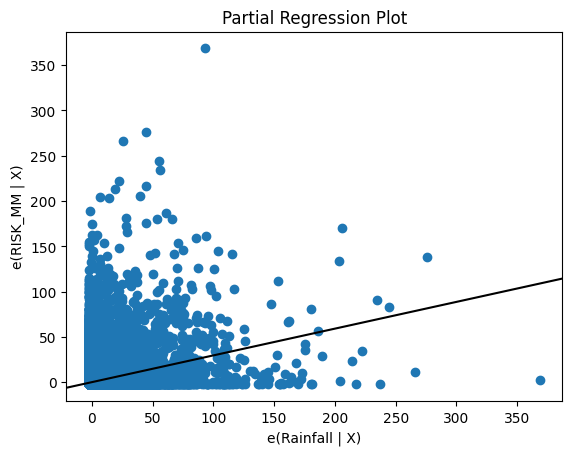

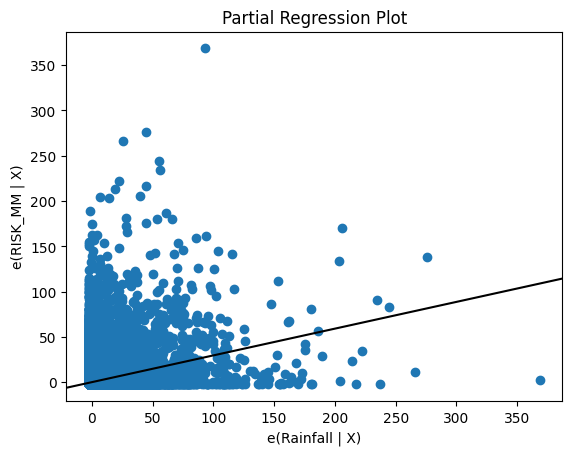

In [ ]:
sm.graphics.plot_partregress('RISK_MM','Rainfall',[], data = df, obs_labels=False)

<ipython-input-78-4dab6f639f84>:1: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(df['RISK_MM'], resultado.resid, use_line_collection=True);


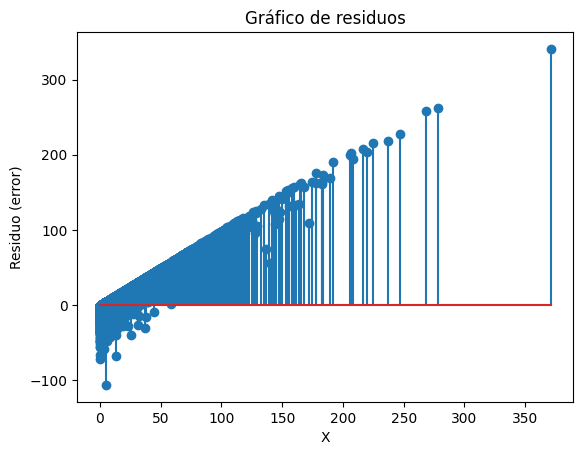

In [ ]:
plt.stem(df['RISK_MM'], resultado.resid, use_line_collection=True);
plt.title("Gráfico de residuos")
plt.xlabel("X")
plt.ylabel("Residuo (error)")
plt.show()